In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
df = pd.read_csv("./Final_Datset/bangalore_aqi.csv")
df.head()

,City,Date,AQI,AQI_Bucket
0,Bengaluru,01-01-2015,91.0,Satisfactory
1,Bengaluru,02-01-2015,91.0,Satisfactory
2,Bengaluru,03-01-2015,91.0,Satisfactory
3,Bengaluru,04-01-2015,91.0,Satisfactory
4,Bengaluru,05-01-2015,91.0,Satisfactory


In [49]:
df['Date'] = pd.to_datetime(df['Date'],dayfirst=True)
df.dtypes

City                  object
Date          datetime64[ns]
AQI                  float64
AQI_Bucket            object
dtype: object

In [50]:
df.drop(['City','AQI_Bucket'],axis=1,inplace=True)

In [51]:
df.columns = ['ds','y']
df

,ds,y
0,2015-01-01,91.0
1,2015-01-02,91.0
2,2015-01-03,91.0
3,2015-01-04,91.0
4,2015-01-05,91.0
...,...,...
2004,2020-06-27,51.0
2005,2020-06-28,61.0
2006,2020-06-29,65.0
2007,2020-06-30,63.0


In [52]:
df.set_index("ds", inplace=True)
df.head()

,y
ds,
2015-01-01,91.0
2015-01-02,91.0
2015-01-03,91.0
2015-01-04,91.0
2015-01-05,91.0


<AxesSubplot:xlabel='ds'>

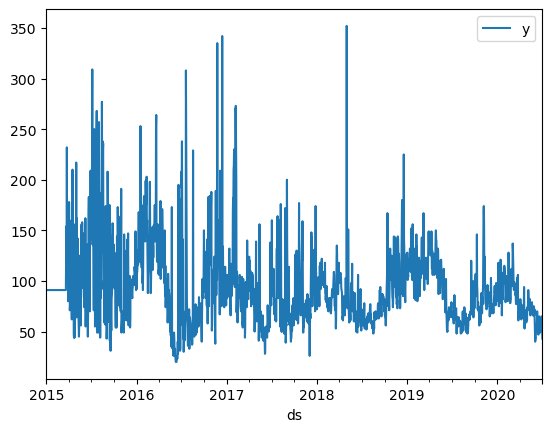

In [53]:
df.plot()

In [54]:
from statsmodels.tsa.stattools import adfuller

def adf_test(timeseries):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','No. of Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
       dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)
adf_test(df['y'])

Results of Dickey-Fuller Test:
Test Statistic                -6.169037e+00
p-value                        6.876698e-08
No. of Lags Used               1.200000e+01
Number of Observations Used    1.996000e+03
Critical Value (1%)           -3.433630e+00
Critical Value (5%)           -2.862989e+00
Critical Value (10%)          -2.567541e+00
dtype: float64


In [55]:
df2 = df['y'].resample('MS').mean()
df2.head()

ds
2015-01-01     91.000000
2015-02-01     91.000000
2015-03-01    105.032258
2015-04-01    113.733333
2015-05-01    102.774194
Freq: MS, Name: y, dtype: float64

In [56]:
train = df2[:int(0.8*(len(df2)))]
test = df2[int(0.8*(len(df2))):]

In [57]:
from pmdarima.arima import auto_arima

# #The default values of several important parameters for auto_arima function are as follows:
# #max_p=5, max_d=2, max_q=5, max_P=2, max_D=1, max_Q=2

arima_model = auto_arima(train, seasonal = True, m = 12, stepwise = False, trace = 1, random_state = 10)

 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=487.615, Time=0.02 sec
 ARIMA(0,0,0)(0,0,1)[12] intercept   : AIC=488.652, Time=0.08 sec
 ARIMA(0,0,0)(0,0,2)[12] intercept   : AIC=490.640, Time=0.10 sec
 ARIMA(0,0,0)(1,0,0)[12] intercept   : AIC=488.659, Time=0.18 sec
 ARIMA(0,0,0)(1,0,1)[12] intercept   : AIC=490.651, Time=0.08 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=492.641, Time=0.17 sec
 ARIMA(0,0,0)(2,0,0)[12] intercept   : AIC=490.629, Time=0.39 sec
 ARIMA(0,0,0)(2,0,1)[12] intercept   : AIC=492.651, Time=0.20 sec
 ARIMA(0,0,0)(2,0,2)[12] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=463.474, Time=0.05 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=464.013, Time=0.10 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=465.764, Time=0.18 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=463.857, Time=0.14 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=466.001, Time=0.15 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=467.763, Time=0.22 sec
 ARIMA(0,0,1)(

In [58]:
import statsmodels.api as sm

model = sm.tsa.statespace.SARIMAX(train, order = (0, 0, 3), seasonal_order = (1, 0, 0, 12), 
                                  enforce_stationarity = False, enforce_invertibility = False)
fitted_model = model.fit(maxiter = 200, method = 'nm')
print(fitted_model.summary())

                                      SARIMAX Results                                      
Dep. Variable:                                   y   No. Observations:                   53
Model:             SARIMAX(0, 0, 3)x(1, 0, [], 12)   Log Likelihood                -181.295
Date:                             Mon, 05 Dec 2022   AIC                            372.590
Time:                                     20:27:42   BIC                            381.158
Sample:                                 01-01-2015   HQIC                           375.710
                                      - 05-01-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          1.5165      0.601      2.525      0.012       0.339       2.694
ma.L2          0.5250      

d:\Anaconda\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


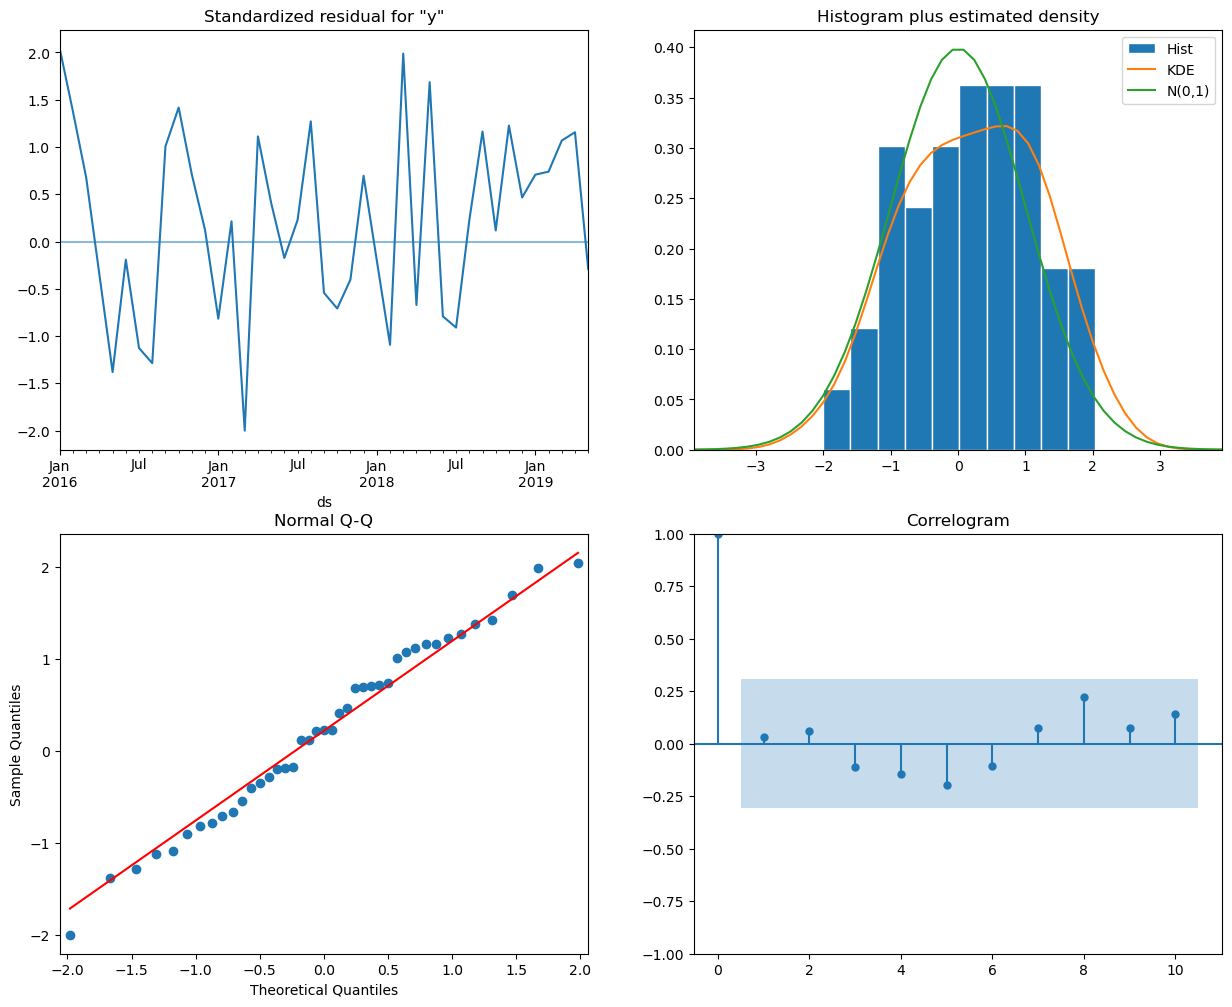

In [59]:
fitted_model.plot_diagnostics(figsize = (15, 12))
plt.show()

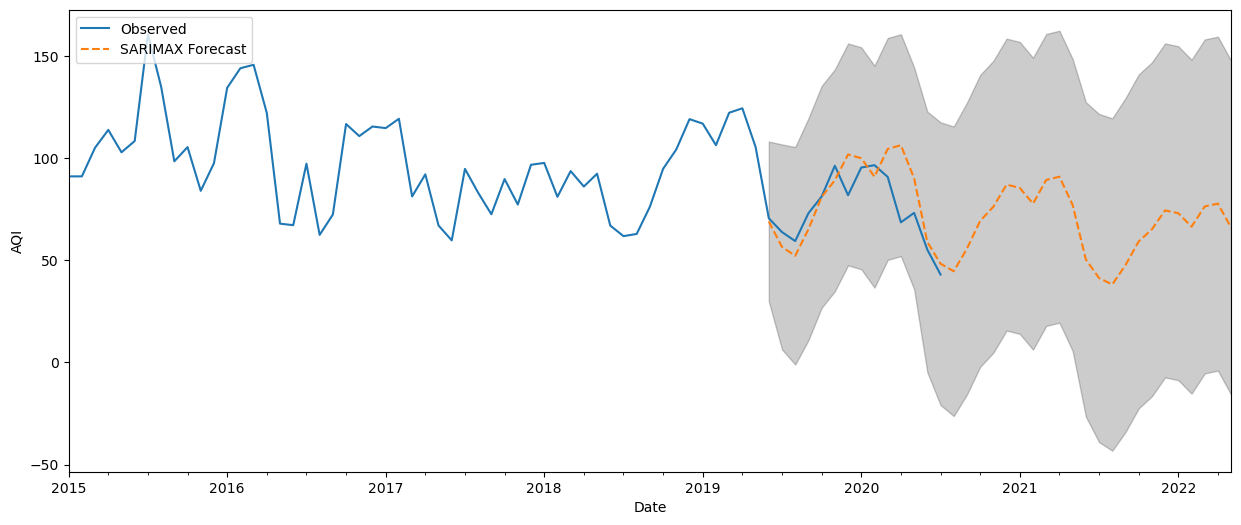

In [60]:
#Getting the SARIMAX forecast with number of steps as 36 since we want to make 3 year prediction and our data is monthly sampled.
pred = fitted_model.get_forecast(steps = 36)
#Plotting the observed and forecasted values:
ax1 = df2['2015':].plot(label = 'Observed')
pred.predicted_mean.plot(ax = ax1, label = 'SARIMAX Forecast', figsize = (15, 6), linestyle = 'dashed')
#Finding the confidence intervals of the forecasts.
pred_ci = pred.conf_int()
ax1.fill_between(pred_ci.index, pred_ci.iloc[:, 0], pred_ci.iloc[:, 1], color = 'k', alpha = 0.2)
ax1.set_xlabel('Date')
ax1.set_ylabel('AQI')
plt.legend(loc = 'upper left')
plt.show()